In [1]:
import tensorflow as tf
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [2]:
IMG_SIZE = 300
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 32

TRAIN_SIZE = 43
TEST_SIZE = 6

TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    classes=['overripe', 'ripe', 'unripe'],
    batch_size=BATCH_SIZE)

test_gen = datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    classes=['overripe', 'ripe', 'unripe'],
    batch_size=BATCH_SIZE)

Found 43 images belonging to 3 classes.
Found 6 images belonging to 3 classes.


In [3]:
num_classes = 3

from keras.utils.vis_utils import plot_model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

print("Visualizing model...")
model.summary()

Visualizing model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 298, 298, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None,

In [4]:
training = model.fit_generator(
    generator=train_gen,
    steps_per_epoch= TRAIN_SIZE // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=test_gen,
    validation_steps= TEST_SIZE // BATCH_SIZE)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1/1 [==============================] - 0s 64ms/step - loss: 1.1140 - accuracy: 0.2727
Epoch 2/50
1/1 [==============================] - 0s 22ms/step - loss: 3.6540 - accuracy: 0.3438
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 2.0423 - accuracy: 0.2188
Epoch 4/50
1/1 [==============================] - 0s 21ms/step - loss: 1.4735 - accuracy: 0.3125
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 1.4897 - accuracy: 0.2727
Epoch 6/50
1/1 [==============================] - 0s 21ms/step - loss: 0.9967 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 1.0636 - accuracy: 0.5312
Epoch 8/50
1/1 [==============================] - 0s 23ms/step - loss: 0.9982 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 23ms/step - loss: 0.9588 - accuracy: 0.6250
Epoch 10/50
1/1 [==============================] - 

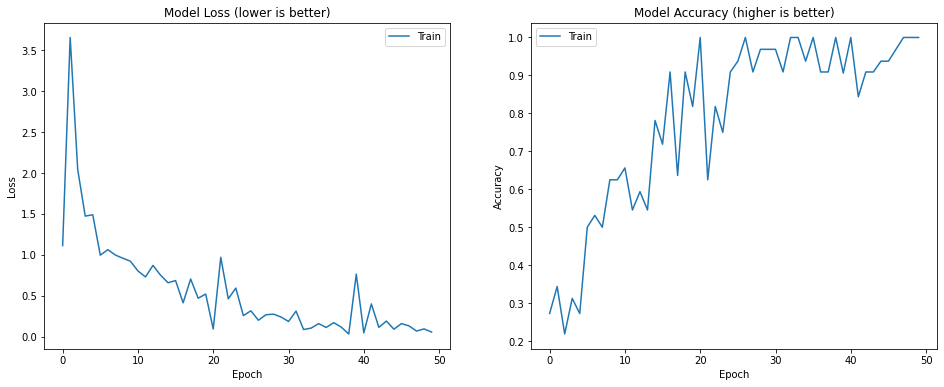

In [5]:
import matplotlib.pyplot as plt  

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,6))

# loss history
ax0.plot(training.history['loss'])
ax0.set_title('Model Loss (lower is better)')
ax0.set_ylabel('Loss')
ax0.set_xlabel('Epoch')
ax0.legend(['Train', 'Test'], loc='upper right')

#accuracy history
ax1.plot(training.history['accuracy'])
ax1.set_title('Model Accuracy (higher is better)')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def predict(img_path):
    # show image
    show_image = mpimg.imread(TEST_IMG_PATH)
    imgplot = plt.imshow(show_image)

    # resize image and turn into array
    img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x = x/255
    result = model.predict(x).tolist()
    
    # Find index of highest value
    idx = np.argmax(result)
    
    prediction = None
    confidence = None
    
    print(result)
    
    if idx == 0:
        prediction = "OVER RIPE"
        confidence = ("{:.2%}".format(result[0][idx]))
    if idx == 1:
        prediction = "RIPE"
        confidence = ("{:.2%}".format(result[0][idx]))
    if idx == 2:
        prediction = "UNDER RIPE"
        confidence = ("{:.2%}".format(result[0][idx]))
    
    print("I am {0} confident that I am {1}".format(confidence, prediction))
    
print("Prediction function ready")

Prediction function ready


[[0.9014843106269836, 0.0984250158071518, 9.072956163436174e-05]]
I am 90.15% confident that I am OVER RIPE


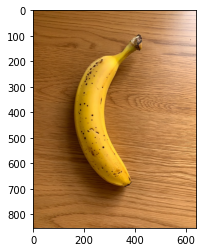

In [12]:
TEST_IMG_PATH = "./images/validation/ripe/1.jpg"

predict(TEST_IMG_PATH)

[[0.9999368190765381, 6.0406095144571736e-05, 2.7545017928787274e-06]]
I am 99.99% confident that I am OVER RIPE


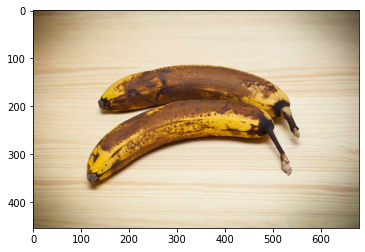

In [8]:
TEST_IMG_PATH = "./images/validation/overripe/1.jpg"

predict(TEST_IMG_PATH)

[[0.005555964075028896, 0.07367414981126785, 0.9207699298858643]]
I am 92.08% confident that I am UNDER RIPE


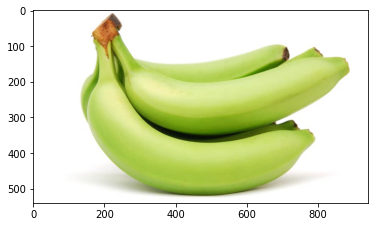

In [9]:
TEST_IMG_PATH = "./images/validation/unripe/2.jpg"

predict(TEST_IMG_PATH)